<font size="6"><h1><center>Spacy</center></h1></font>


<font size="1">spaCy is a free and open-source library for Natural Language Processing (NLP) in Python with a lot of in-built capabilities. It’s built for production use and provides a concise and user-friendly API.</font>    

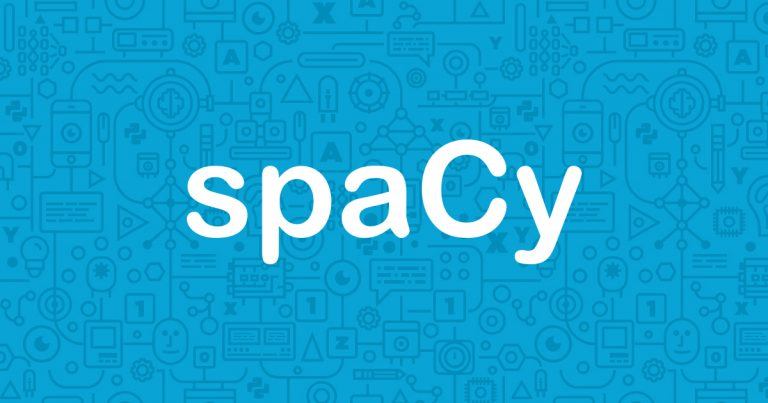

### How to Install spaCy??

In [39]:
## to install spacy
#!pip install spacy

In [10]:
## training on a single data
!python -m spacy info

2021-12-18 08:10:16.123299: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-18 08:10:16.123345: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.

============================== Info about spaCy ==============================

spaCy version    3.2.1                         
Location         /home/admins/anaconda3/lib/python3.8/site-packages/spacy
Platform         Linux-5.11.0-41-generic-x86_64-with-glibc2.10
Python version   3.8.8                         
Pipelines                                      



In [40]:
#if we want to download small english library then use below command
#! python -m spacy download en_core_web_sm
#if we want to download large english library then use below command
#! python -m spacy download en_core_web_lg

In [12]:
import spacy 

In [13]:
nlp1 = spacy.load('en_core_web_sm')

In [22]:
doc1 = nlp1("im learning awesome python and machine learning")

In [23]:
for token in doc1:
    # Print the token and its part-of-speech tag
    print(token.text, "-->", token.pos_)

i --> PRON
m --> AUX
learning --> VERB
awesome --> ADJ
python --> PROPN
and --> CCONJ
machine --> NOUN
learning --> NOUN


## 3. Named Entity Recognition using spaCy

#### Here is one Named entity recognition

In [14]:
## to add colors to words and respective entity
from spacy import displacy

In [26]:
doc3=nlp1('Raju regulary go to school. His mother is Vandana who is working as maid in Khanapur. Raju want to go to trip at Lavasa. His teacher Anna want him to come')

In [27]:
for ent in doc3.ents:
    print(ent.text, ent.label_)

Vandana PERSON
Khanapur GPE
Lavasa GPE
Anna PERSON


In [28]:
##  Visually we can observe how entities looks
displacy.render(doc3,style="ent",jupyter=True)

#### Lets try large library of spacy

In [18]:
nlp2 = spacy.load('en_core_web_lg')

In [19]:
doc4=nlp2('Raju regulary go to school. His mother is Vandana who is working as maid in Khanapur. Raju want to go to trip at Lavasa. His teacher anna want him to come')

In [20]:
for ent in doc4.ents:
    print(ent.text, ent.label_)

Raju PERSON
Vandana PERSON
Khanapur GPE
Lavasa GPE
anna PERSON


In [21]:
##  Visually we can observe how entities looks
displacy.render(doc4,style="ent",jupyter=True)

## Custom named entity recognition

#### Training named entity recognation model with spacy 3+ version

In [29]:
from spacy.training import Example

In [32]:
nlp=spacy.load('en_core_web_sm')
# Getting the pipeline component
ner=nlp.get_pipe("ner")

In [33]:
text = "Facebook released React in 2014"
annotations = {"entities": ["U-ORG", "O", "U-TECHNOLOGY", "O", "U-DATE"]}
example = Example.from_dict(nlp.make_doc(text), annotations)
print(example)
#nlp.update([text], [annotations])
nlp.update([example])

{'doc_annotation': {'cats': {}, 'entities': ['U-ORG', 'O', 'U-TECHNOLOGY', 'O', 'U-DATE'], 'links': {}}, 'token_annotation': {'ORTH': ['Facebook', 'released', 'React', 'in', '2014'], 'SPACY': [True, True, True, True, False], 'TAG': ['', '', '', '', ''], 'LEMMA': ['', '', '', '', ''], 'POS': ['', '', '', '', ''], 'MORPH': ['', '', '', '', ''], 'HEAD': [0, 1, 2, 3, 4], 'DEP': ['', '', '', '', ''], 'SENT_START': [1, 0, 0, 0, 0]}}


{'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 3.927649556992449}

In [34]:
doc = nlp('Facebook released React in 2014')
print('Entities', [(ent.text, ent.label_) for ent in doc.ents])

Entities [('Facebook', 'ORG'), ('2014', 'DATE')]


In [35]:
## training on multiple data

In [36]:
texts=['Who is Nishanth?','Who is Kamal Khumar?']
annotations=[{'entities': ['O','O','U-PERSON' ]},{'entities': ['O','O', 'U-PERSON']}]

In [37]:
examples=[]
for text, annotation in zip(texts,annotations):
    examples.append(Example.from_dict(nlp.make_doc(text), annotation))
print(examples)
nlp.update(examples)

[{'doc_annotation': {'cats': {}, 'entities': ['O', 'O', 'U-PERSON', 'O'], 'links': {}}, 'token_annotation': {'ORTH': ['Who', 'is', 'Nishanth', '?'], 'SPACY': [True, True, False, False], 'TAG': ['', '', '', ''], 'LEMMA': ['', '', '', ''], 'POS': ['', '', '', ''], 'MORPH': ['', '', '', ''], 'HEAD': [0, 1, 2, 3], 'DEP': ['', '', '', ''], 'SENT_START': [1, 0, 0, 0]}}, {'doc_annotation': {'cats': {}, 'entities': ['O', 'O', 'U-PERSON', 'O', 'O'], 'links': {}}, 'token_annotation': {'ORTH': ['Who', 'is', 'Kamal', 'Khumar', '?'], 'SPACY': [True, True, True, False, False], 'TAG': ['', '', '', '', ''], 'LEMMA': ['', '', '', '', ''], 'POS': ['', '', '', '', ''], 'MORPH': ['', '', '', '', ''], 'HEAD': [0, 1, 2, 3, 4], 'DEP': ['', '', '', '', ''], 'SENT_START': [1, 0, 0, 0, 0]}}]


{'tok2vec': 0.0, 'tagger': 0.0, 'parser': 0.0, 'ner': 3.153678437355089}

In [38]:
doc = nlp('Who is Kamal Khumar?')
print('Entities', [(ent.text, ent.label_) for ent in doc.ents])

Entities [('Kamal Khumar', 'PERSON')]


In [ ]:
# regex - rule based
- (30) days - (  /d+ ) space + days
- 30 days
- 30-days

- 30:days

In [ ]:
custom entity recognition